In [1]:
import os 
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Construct Training Dataset

- feature data set

In [2]:
def Read_Pickle(file_path):
    
    pickle_in = open(file_path,"rb")
    pickle_in  = pickle.load(pickle_in)

    return pickle_in

all_feature_df = Read_Pickle(r"all_feature_df.pickle")
all_feature_df

,row_id,log_return1_realized_volatility_0,log_return2_realized_volatility_0,wap_balance_mean_0,price_spread_mean_0,bid_spread_mean_0,ask_spread_mean_0,volume_imbalance_mean_0,total_volume_mean_0,wap1_mean_0,...,trade_log_return_realized_volatility_300,trade_per_size_mean_300,trade_price_mean_300,trade_order_count_mean_300,trade_size_mean_300,trade_log_return_realized_volatility_450,trade_per_size_mean_450,trade_price_mean_450,trade_order_count_mean_450,trade_size_mean_450
0,0-1000,0.001731,0.004370,6.220178e-05,0.000445,35.950920,19.932515,143.061350,290.680982,0.998795,...,0.000908,15.328571,0.998402,2.142857,34.142857,0.000644,16.120000,0.998464,3.000000,43.000000
1,0-10000,0.002863,0.004082,-2.808591e-05,0.000461,-35.936842,-7.589474,148.192982,370.445614,0.999884,...,0.001083,22.169048,1.000283,3.428571,86.714286,0.000733,22.333333,1.000144,2.333333,81.000000
2,0-10005,0.008673,0.013693,1.362336e-04,0.002113,24.928962,-15.721311,109.502732,333.338798,1.001308,...,0.002449,12.886724,1.002050,3.416667,79.916667,0.002223,12.996753,1.001380,4.000000,84.375000
3,0-10017,0.014300,0.019203,1.099671e-04,0.003557,-29.185022,32.810573,166.348018,380.215859,0.996158,...,0.007005,30.191122,1.000240,3.950000,108.150000,0.005085,19.033814,0.998491,4.416667,71.833333
4,0-10030,0.002503,0.004478,-9.844954e-06,0.000624,19.025907,45.471503,88.310881,325.678756,0.999461,...,0.001090,34.142857,0.999041,2.000000,90.071429,0.000941,48.666667,0.999022,2.142857,117.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428927,99-9972,0.001629,0.002200,-9.264394e-06,0.000218,-290.316888,-299.654649,510.032258,2459.311195,1.002490,...,0.000987,70.907540,1.003342,3.226415,256.018868,0.000768,65.187821,1.003537,2.730769,220.384615
428928,99-9973,0.009243,0.013491,1.849897e-06,0.000701,-8.414449,-68.642586,330.091255,836.444867,1.005890,...,0.004671,74.775854,1.006534,4.553398,359.893204,0.003244,71.710942,1.005701,4.581818,362.563636
428929,99-9976,0.005455,0.006021,-2.222960e-07,0.000512,-96.512295,-2.020492,585.770492,1033.549180,0.992295,...,0.002327,62.092654,0.990129,3.472527,258.879121,0.001678,55.321170,0.989176,3.854545,245.218182
428930,99-9988,0.001239,0.001573,5.616904e-05,0.000171,-18.149289,-641.516588,685.021327,3668.002370,1.000000,...,0.000745,83.895184,0.999644,5.593750,501.687500,0.000503,76.895055,0.999510,5.062500,428.125000


- train target dataset

In [3]:
train_df = pd.read_csv('./train.csv')
train_df['row_id'] = train_df['stock_id'].astype(str) + '-' + train_df['time_id'].astype(str)
train_df = train_df[['row_id','target']]
train_df

,row_id,target
0,0-5,0.004136
1,0-11,0.001445
2,0-16,0.002168
3,0-31,0.002195
4,0-62,0.001747
...,...,...
428927,126-32751,0.003461
428928,126-32753,0.003113
428929,126-32758,0.004070
428930,126-32763,0.003357


- merge train target and feature dataframe

In [4]:
df_joined = train_df.merge(all_feature_df, on = ['row_id'], how = 'left')
df_joined.index = df_joined['row_id']
df_joined = df_joined.drop(['row_id'],axis=1)
df_joined = df_joined.fillna(value=0)
df_joined

,target,log_return1_realized_volatility_0,log_return2_realized_volatility_0,wap_balance_mean_0,price_spread_mean_0,bid_spread_mean_0,ask_spread_mean_0,volume_imbalance_mean_0,total_volume_mean_0,wap1_mean_0,...,trade_log_return_realized_volatility_300,trade_per_size_mean_300,trade_price_mean_300,trade_order_count_mean_300,trade_size_mean_300,trade_log_return_realized_volatility_450,trade_per_size_mean_450,trade_price_mean_450,trade_order_count_mean_450,trade_size_mean_450
row_id,,,,,,,,,,,,,,,,,,,,,
0-5,0.004136,0.004499,0.006999,0.000065,0.000852,-2.627907,-15.661130,134.275748,323.471761,1.003733,...,0.001308,18.628798,1.003679,2.571429,75.571429,0.001060,16.764626,1.003417,2.642857,74.428571
0-11,0.001445,0.001204,0.002476,0.000032,0.000393,53.864322,-24.221106,142.286432,411.733668,1.000240,...,0.000587,26.822917,1.000392,2.250000,56.250000,0.000501,39.966667,1.000488,2.200000,82.800000
0-16,0.002168,0.002369,0.004801,-0.000141,0.000725,-18.417112,57.807487,140.267380,416.310160,0.999541,...,0.001137,27.236111,0.998508,3.166667,99.083333,0.001048,32.240741,0.998130,3.666667,120.555556
0-31,0.002195,0.002574,0.003637,0.000195,0.000863,43.218487,-9.319328,147.394958,433.126050,0.998819,...,0.001089,34.623457,0.998780,5.111111,172.888889,0.000802,30.250000,0.998106,3.666667,171.333333
0-62,0.001747,0.001894,0.003257,-0.000008,0.000396,31.931429,41.668571,124.011429,344.457143,0.999616,...,0.000453,19.656506,0.999555,4.909091,110.818182,0.000360,2.725000,0.999547,3.500000,10.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126-32751,0.003461,0.003691,0.005876,-0.000004,0.000878,35.776699,6.631068,161.210356,406.297735,0.999580,...,0.001451,19.007407,0.999051,2.055556,44.222222,0.001058,19.750000,0.998939,1.833333,40.916667
126-32753,0.003113,0.004104,0.004991,-0.000128,0.000706,1.945946,1.617117,150.743243,242.950450,1.002481,...,0.001791,10.883333,1.003403,3.550000,55.350000,0.001388,9.397436,1.003850,1.769231,25.076923
126-32758,0.004070,0.003117,0.006020,0.000083,0.000738,66.792157,-8.286275,254.482353,347.737255,1.001082,...,0.001580,45.681250,1.000844,2.541667,114.583333,0.001244,31.638889,1.001030,2.166667,58.000000


# Train and Save the Model

- train test split and fit the model.

In [5]:
X = df_joined.drop(['target'],axis=1)
y = df_joined['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("X train dataset:\n",X_train.shape)
print("y train dataset:\n",y_train.shape)

print("X test dataset:\n",X_test.shape)
print("y test dataset:\n",y_test.shape)

X train dataset:
 (321699, 60)
y train dataset:
 (321699,)
X test dataset:
 (107233, 60)
y test dataset:
 (107233,)


In [6]:
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [7]:
y_pred = forest.predict(X_test)
y_pred

array([0.00678478, 0.00223089, 0.00303075, ..., 0.00245278, 0.00378931,
       0.00346727])

# Compare to baseline autocorrelation realized volatility model

In [9]:
def rmspe(y_true, y_pred):
    return  (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))))

y_pred_df = forest.predict(X)

R2 = round(r2_score(y_true = df_joined['target'], y_pred = y_pred_df ),3)
RMSPE = round(rmspe(y_true = df_joined['target'], y_pred =  y_pred_df ),3)

print(f'Performance of the naive prediction:\nR2 score: {R2}, \nRMSPE: {RMSPE}.')

Performance of the naive prediction:
R2 score: 0.932, 
RMSPE: 0.179.


# Score on train-test spilt's Test Set 

In [10]:
R2 = round(r2_score(y_true = y_test, y_pred = y_pred),3)
RMSPE = round(rmspe(y_true = y_test, y_pred = y_pred),3)

print(f'Performance of the naive prediction:\nR2 score: {R2}, \nRMSPE: {RMSPE}.')

Performance of the naive prediction:
R2 score: 0.81, 
RMSPE: 0.299.


Elapsed time to compute the importances: 0.370 seconds


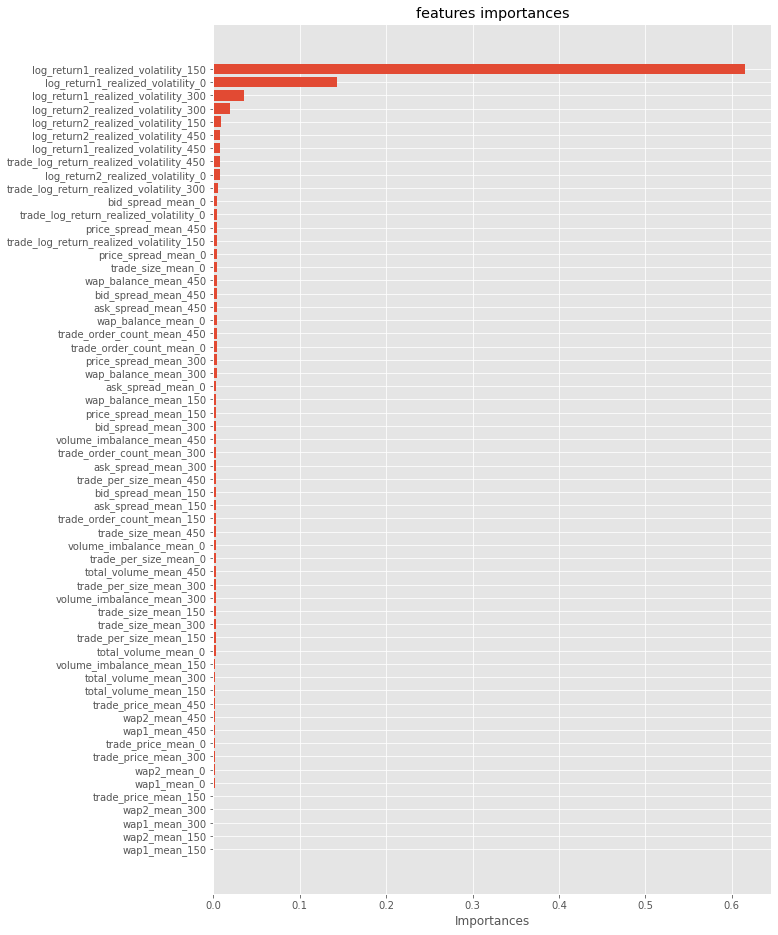

,Importances
log_return1_realized_volatility_150,0.6153
log_return1_realized_volatility_0,0.1435
log_return1_realized_volatility_300,0.0353
log_return2_realized_volatility_300,0.0196
log_return2_realized_volatility_150,0.0089
log_return2_realized_volatility_450,0.0081
log_return1_realized_volatility_450,0.0076
trade_log_return_realized_volatility_450,0.0075
log_return2_realized_volatility_0,0.0072
trade_log_return_realized_volatility_300,0.0055


In [11]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.DataFrame(importances, index = X.columns,columns=['Importances']).sort_values(['Importances'],ascending=False).round(decimals=4)

fig,ax = plt.subplots(figsize=(10,16))
ax.set_title('features importances')
ax.barh(forest_importances.index, forest_importances.Importances, align='center')
ax.set_xlabel('Importances')
ax.invert_yaxis()  # labels read top-to-bottom
plt.show()

forest_importances

- Joblib to save the model

In [12]:
import joblib

filename = 'RF_finalized_model.sav'
joblib.dump(forest, filename)

['RF_finalized_model.sav']